# matplotalt VLM Examples

Like matplotalt's main ``show_with_alt`` function, we can use ``show_with_api_alt`` and ``generate_api_alt_text`` to generate and image descriptions using vision language models. The examples below are all generated with GPT4v.

In [1]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

from matplotalt import show_with_api_alt, generate_api_alt_text, add_alt_text

# We need to load an API key to access the models
OPENAI_API_KEY = os.environ.get("OPENAI_API_KEY")

## Sunshine and Bikes in Seattle (Bar, Line, Pie and Radial charts)

In this section, we introduce how to use matplotalt VLM functions with examples on four chart types. We use monthly average sunshine hours in seattle and bike count from the [Fremont Bridge Bicycle Counter](https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k) as data. The goal of the following visualizations is to show that both datasets are correlated and have seasonal patterns.

In [2]:
# Data
bikes_over_fremont_bridge = np.array([112252.8, 103497.2, 136189.2, 165020.4, 231792, 221274.8,
                                      234421.6, 224087.2, 190238, 166078, 121548, 89695.6])
sunshine_hours = np.array([69, 108, 178, 207, 253, 268, 312, 281, 221, 142, 72, 52])
months = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"]

### Bar chart

``show_with_api_alt`` and ``generate_api_alt`` support the same methods to surface alt text as ``show_with_alt``. To run the methods, we need to input an API key as the first parameter.

The api methods also have a ``use_starter_alt_in_prompt`` parameter. When true, alt text generated from ``show_with_alt`` is used in the prompt to guide the VLM's description.

This is a horizontal bar chart titled 'Average Number of Bikes Crossing Fremont Bridge Each Month from 2014-2018.' The color of the bars is a uniform blue, with no patterns or textures. The chart displays average bike crossings as the independent variable on the horizontal x-axis, ranging from 0 to 250,000, while months of the year are on the vertical y-axis, listed from January to December.

The chart shows that July has the highest average number of bike crossings at approximately 234,000, indicating a peak in cycling activity during the summer months. December has the lowest average, around 89,700, reflecting a drop in winter. This trend likely correlates with weather conditions affecting cycling habits. No obvious outliers are present. Overall, there's a clear seasonal pattern, with higher bike crossings in warmer months and lower crossings during colder months, which is common in locations with significant seasonal weather changes.


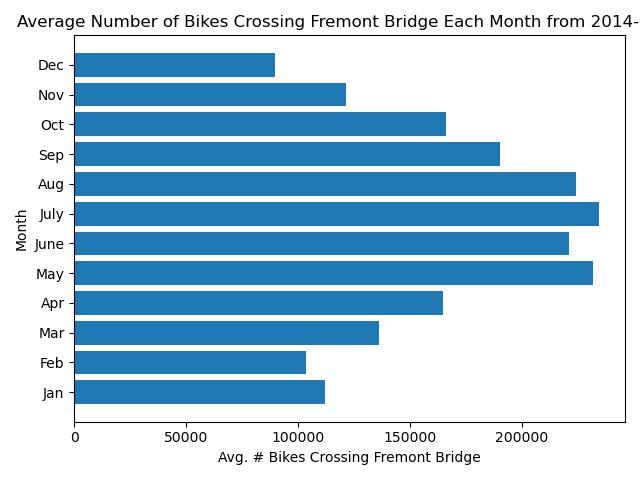

In [5]:
# (2) Bar chart
# Bike count averaged over 2014-2018 from the Freemont Bridge Bicycle Counter (https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k)
fig, ax = plt.subplots()
ax.set_title("Average Number of Bikes Crossing Fremont Bridge Each Month from 2014-2018")
ax.barh(list(range(12)), bikes_over_fremont_bridge)
ax.set_xlabel("Avg. # Bikes Crossing Fremont Bridge")
ax.set_ylabel("Month")
ax.set_yticks(ticks=list(range(0, 12)), labels=months)
plt.tight_layout()

show_with_api_alt(OPENAI_API_KEY, methods=["html", "markdown"], use_starter_alt_in_prompt=True)

### Line chart

We can choose how descriptive the alt text should be with the desc_level parameter. These levels are based on [Lundgard and Satyanarayan 2021](https://ieeexplore.ieee.org/abstract/document/9555469).

Unlike show_with_alt, the api methods default to a desc_level of 4 (including broader context). Note that this parameter only changes the VLM prompt and is not guarenteed to result in the desired level of description.

This is a line chart titled 'Average Monthly Hours of Sunshine in Seattle vs. Number of Bikes that Cross Fremont Bridge'. The horizontal x-axis represents the months from January to November, while the vertical y-axis shows the percentage change from the yearly average, ranging from -80% to 100%. Two variables are plotted: the number of bikes crossing Fremont Bridge is depicted with a dashed steelblue line, and the hours of sunshine with a solid dark orange line. Both variables exhibit a peak in June, with the maximum number of bikes at 40.9% and the highest hours of sunshine at 73.1%. An annotation highlights '234421 bikes in July'. The data shows strong seasonality and a high correlation of 0.95 between sunshine and bike crossing, indicating that more people are likely to bike during sunnier months. The chart suggests that weather significantly influences transport behavior in Seattle.

data table:

| month | # bikes crossing fremont bridge (change from yearly average (%)) | hours of sunshine (change from yearly average (%)) |
| ----- | ---------------------------------------------------------------- | -------------------------------------------------- |
| 0     | -32.52                                                           | -61.72                                             |
| 1     | -37.78                                                           | -40.08                                             |
| 2     | -18.13                                                           | -1.248                                             |
| 3     | -0.7941                                                          | 14.84                                              |
| 4     | 39.35                                                            | 40.36                                              |
| 5     | 33.02                                                            | 48.68                                              |
| 6     | 40.93                                                            | 73.09                                              |
| 7     | 34.72                                                            | 55.89                                              |
| 8     | 14.37                                                            | 22.61                                              |
| 9     | -0.1582                                                          | -21.22                                             |
| 10    | -26.93                                                           | -60.06                                             |
| 11    | -46.08                                                           | -71.15                                             |


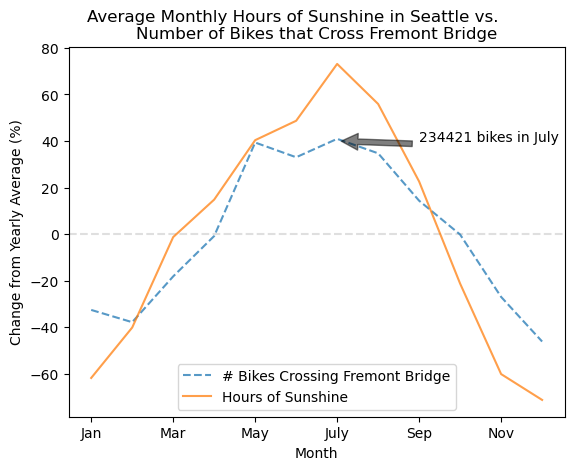

In [3]:
# (1) Line Chart
avg_bikes = np.mean(bikes_over_fremont_bridge)
avg_hours = np.mean(sunshine_hours)
normalized_bikes = 100 * (bikes_over_fremont_bridge - avg_bikes) / avg_bikes
normalized_sunshine = 100 * (sunshine_hours - avg_hours) / avg_hours

plt.title("Average Monthly Hours of Sunshine in Seattle vs. \
        \nNumber of Bikes that Cross Fremont Bridge")
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.25)
plt.plot(normalized_bikes, ls="--", label="# Bikes Crossing Fremont Bridge", alpha=0.75)
plt.plot(normalized_sunshine, label="Hours of Sunshine", alpha=0.75)
plt.xticks(ticks=list(range(0, 11, 2)), labels=months[::2])
plt.xlabel("Month")
plt.ylabel("Change from Yearly Average (%)")
plt.annotate('234421 bikes in July', xy=(6, 40), xytext=(8, 40), arrowprops=dict(facecolor='black', shrink=0.05, alpha=0.5))
plt.legend()

show_with_api_alt(OPENAI_API_KEY, methods=["markdown", "md_table"], use_starter_alt_in_prompt=True)

### Pie chart

We can still pass a list of stats, but this will only affect the starter alt text passed to the model through the prompt.

This is a pie chart titled 'Percentage of Annual Sunshine,' featuring twelve colored wedges representing months of the year. Starting with January in a light blue and moving clockwise, each month is a different color, with December ending in a darker blue shade. The largest wedge is in purple representing July (14.4%), and the smallest wedge is dark blue representing December (2.4%). Each wedge has the month and percentage value labeled on it. The chart shows the amount of sunshine peaking in July and reaching its lowest in December, indicating a trend where sunshine increases through the first half of the year and decreases in the second half, with a smooth transitional gradient in colors matching the seasonal progression.

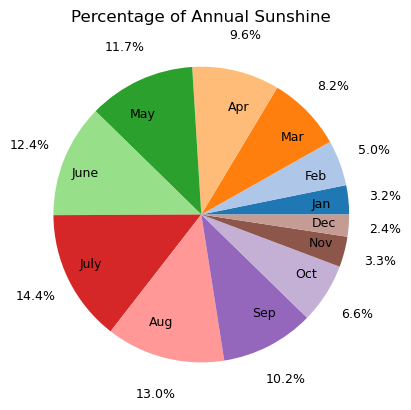

In [8]:
# (3) Pie chart
cmap = plt.cm.tab20
colors = cmap(list(range(12)))
plt.pie(sunshine_hours, labels=months, autopct='%1.1f%%', pctdistance=1.25,
                        labeldistance=0.75, colors=colors, textprops={'fontsize': 9})
plt.title("Percentage of Annual Sunshine")

show_with_api_alt(OPENAI_API_KEY, desc_level=3, methods=["markdown"], stats=["std", "mean", "max", "min"], include_starter_alt_in_prompt=True)

### Radial line chart

We can seperately generate and surface the alt text with the generate_api_alt_text and add_alt_text methods


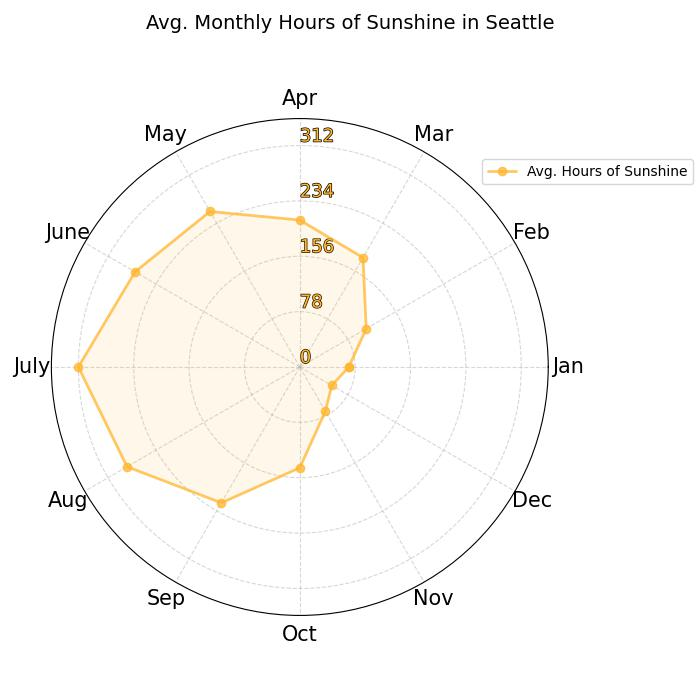

A radial line plot titled 'avg. Monthly hours of sunshine in seattle'. The x-axis ranges from
 jan to dec using a datetime scale, and the y-axis ranges from 0 to 312 using a linear scale. Avg.
 hours of sunshine is plotted in goldenrod. Avg. Hours of sunshine have a minimum value of y=52 at
 x=dec, a maximum value of y=312 at x=july, and an average of y=180.


In [7]:
# (4) Radial line chart
from matplotlib import patheffects
from scipy.interpolate import pchip

SUN_COLOR = "#FFB631"

# Convert bike and sunshine stats into radial coordinates
monthnums = np.array(list(range(12)))
r = sunshine_hours
theta = (monthnums * np.pi) / 6
interp = pchip(theta, r)
tt = np.linspace(0, 2 * np.pi, 360)
r = list(sunshine_hours) + [sunshine_hours[0]]
theta = list(theta) + [theta[0]]
interptt = list(interp(tt)) + [interp(tt)[0]]
tt = list(tt) + [tt[0]]

# Start building matplotlib figure
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
fig.suptitle("Avg. Monthly Hours of Sunshine in Seattle", fontsize=14)
# Configure twin axes
ax.set_rticks(np.linspace(0, np.amax(r), 5))  # Reduce the number of radial ticks
bike_labels = (np.linspace(0, np.amax(bikes_over_fremont_bridge), 5).astype(int) // 1000).astype(str)
bike_labels = [l + "K" for l in bike_labels]
bike_labels[0] = "0"
ax.set_rlabel_position(ax.get_rlabel_position())
ax.set_rlabel_position(90)
ax.tick_params(labelsize=13)
# Add outside month labels
ax.set_xticks(np.arange(0,2.0*np.pi,np.pi/6.0))
ax.set_xticklabels(months, fontsize=15)
# Add dashed grid lines
ax.grid(True, alpha=0.5, linestyle="dashed")
ax.set_axisbelow(True)
plt.setp(ax.get_yticklabels(), color=SUN_COLOR)
ax.set_ylim([0, 350])

# Plot the radial lines and fills
ax.plot(theta, r, linewidth=2, color=SUN_COLOR, label='Avg. Hours of Sunshine',
        solid_capstyle='round', zorder=100, marker="o", alpha=0.75)
ax.fill_between(theta, r, facecolor=SUN_COLOR, alpha=0.1, zorder=99)
ax.legend(loc="lower left", bbox_to_anchor=(.5 + np.cos(np.pi / 4)/2, .5 + np.sin(np.pi / 4)/2))

# Add outlines for the tick labels to increase contrast
for tick in (ax.get_yticklabels()):
  tick.set_path_effects([patheffects.withStroke(linewidth=1, foreground='black')])
# Make sure ticks are drawn on top of lines and fills
ax.tick_params(zorder=200)
plt.gcf().set_size_inches(7, 7)
plt.tight_layout()


starter_alt = generate_api_alt_text(OPENAI_API_KEY)
add_alt_text(starter_alt)
print(starter_alt)

## 2d Gaussian example (scatter, strip, contour plots, and heatmaps)

In this section we cover four more chart types with a larger dataset of points from 2d gaussian distributions

In [9]:
# Data
blue_random_gaussian_2d = np.random.multivariate_normal([1, 2], [[4, -2], [-2, 3]], size=350)
orange_random_gaussian_2d = np.random.multivariate_normal([-4, 3], [[3, -1], [-1, 3]], size=250)

### Scatter plot

We can specify the max length of the VLM-generated alt text with the ``max_tokens`` parameter

This scatter plot, titled 'Points from 2d Gaussian Distributions,' shows blue and orange dots representing two datasets. The x-axis ranges from -10 to 7.5, while the y-axis ranges from -6 to 6. The blue dots seem more concentrated around the center with an upwards trend, while the orange dots are more spread out, indicating different variances. The linear fits suggest a negative correlation for both datasets, but no socio-political or current event insights can be derived


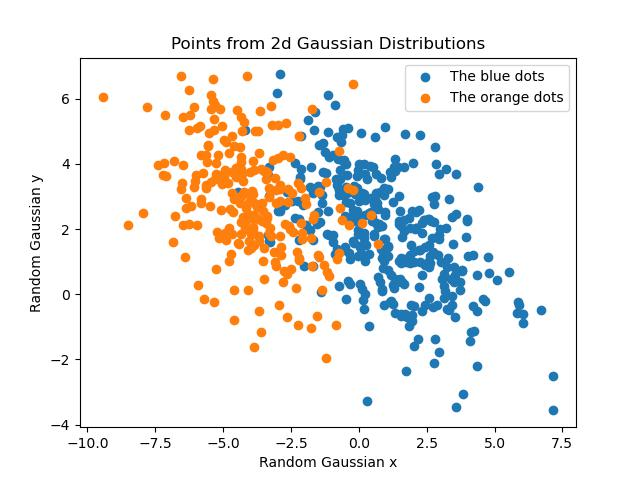

In [10]:
# (5) Scatterplot
plt.scatter(blue_random_gaussian_2d[:, 0], blue_random_gaussian_2d[:, 1], label="The blue dots")
plt.scatter(orange_random_gaussian_2d[:, 0], orange_random_gaussian_2d[:, 1], label="The orange dots")
plt.title("Points from 2d Gaussian Distributions")
plt.xlabel("Random Gaussian x")
plt.ylabel("Random Gaussian y")
plt.legend()

# img_file will write to a file based on the chart's title if no output_file is given
show_with_api_alt(OPENAI_API_KEY, methods=["html", "markdown", "img_file"], max_tokens=100)

### Strip plot

This is a strip plot displaying two categories of data points, identified as 'The blue dots' and 'The orange dots.' The x-axis, labeled 'Random Gaussian x,' ranges from −10.0 to 7.5, while the y-axis is categorical without specified numerical values. The blue dots, plotted in a steelblue color, are more concentrated around the center, suggesting a higher density near their median value of x=0.944, with some points spread out towards the ends of the axis, including 3 outliers. The orange dots, colored in darkorange, are distributed across the scale with a median of x=-4.06 and also exhibit 3 outliers. There's a notable difference in the central tendency of the two groups, with the blue dots centered around a positive median and the orange dots around a negative one. The plot does not include a title or legend, but the color coding and positioning clearly distinguish the two sets of data.


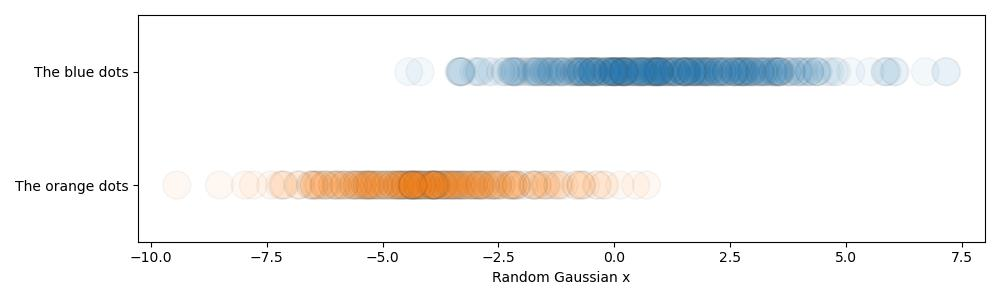

In [11]:
# (6) Strip plot
sns.stripplot([blue_random_gaussian_2d[:, 0], orange_random_gaussian_2d[:, 0]],
              jitter=False, size=20, linewidth=1, alpha=0.05, orient="h")
plt.gcf().set_size_inches(10, 3)
plt.xlabel("Random Gaussian x")
plt.yticks(ticks=[0, 1], labels=["The blue dots", "The orange dots"])
plt.tight_layout()

show_with_api_alt(OPENAI_API_KEY, chart_type="strip", desc_level=3, methods=["html", "markdown"])

### Heatmap

This is a 7x6 heatmap titled 'Number of points from combined gaussians'. The x-axis ranges from −8 to 6, and the y-axis ranges from −4 to 8. The z-axis, which represents the number of gaussian points, ranges from 0 to 60 and is indicated by a color scale on the right. The colors vary from purple (representing lower values) to yellow (representing higher values). The heat concentration, shown by the yellow area, peaks at z=57 near the coordinates (−4, 2), which indicates the highest density of points from the combined gaussians, while the lowest density is at (−8, −4) with z=0. There's a clear trend where the number of points is centered in a specific region, decreasing as the distance from this center increases, which is characteristic of a normal distribution.


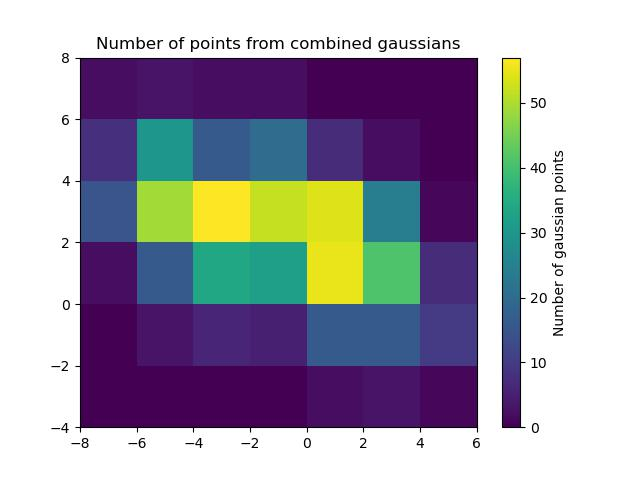

In [12]:
# (7) Heatmap
combined_points = np.concatenate((blue_random_gaussian_2d, orange_random_gaussian_2d))
plt.hist2d(combined_points[:, 0], combined_points[:, 1], bins=(range(-8, 8, 2), range(-4, 10, 2)))
plt.title('Number of points from combined gaussians')
plt.colorbar(label="Number of gaussian points")
show_with_api_alt(OPENAI_API_KEY, methods=["html", "markdown"])

### Contour plot

This is a contour plot titled 'Number of points from combined gaussians'. The x-axis ranges from -8 to 4, and the y-axis ranges from -2 to 4, with both using linear scales. The plot features multiple contour lines indicating different values, which include several '0' values, '5', '10', '15', '20', '25', '30', and '35'. The contour lines create a 2D topographical representation of data density or values across the plane. The max contour value, which appears to be '35', is around the coordinates (-0.517, 2.12), signifying the highest concentration or peak in this data set. Contour lines closer together indicate steeper gradients. The plot uses a color gradient of blue to green to distinguish between the different contour levels, with blue indicating lower values and green indicating higher ones. This point density or value distribution may relate to the occurrence or intensity of some phenomena in the fields


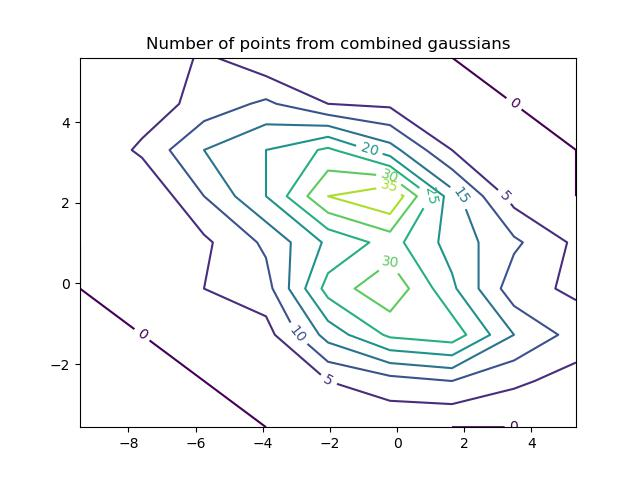

In [13]:
# (8) Contour plot
hist_bins, xbins, ybins = np.histogram2d(combined_points[:, 0], combined_points[:, 1], bins=9)
X, Y = np.meshgrid(xbins[:-1], ybins[:-1])

fig, ax = plt.subplots()
CS = ax.contour(X, Y, hist_bins)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Number of points from combined gaussians')

show_with_api_alt(OPENAI_API_KEY, chart_type="contour", methods=["html", "markdown"])

## Anscombe's quartet (multiple Subplots, boxplot)

``generate_alt_text`` can also handle figures with multiple subplots. In that case, it outputs the suptitle and then paragraphs containing the alt text for each subplot seperated by newlines.

In this example we have four line subplots displaying Anscombe's Quartet. Each line plot has the same mean, standard deviation, and line of fit, but very different shapes. The second subplot, for example, looks similar to a parabola while the fourth has all its points at the same x position with a single outlier.

x and y coordinates for each of the lines are in the table below:

| x1, x2, x3 | y1    | y2   | y3    | x4 | y4    |
|------|-------|------|-------|----|-------|
| 10   | 8.04  | 9.14 | 7.46  | 8  | 6.58  |
| 8    | 6.95  | 8.14 | 6.77  | 8  | 5.76  |
| 13   | 7.58  | 8.74 | 12.74 | 8  | 7.71  |
| 9    | 8.81  | 8.77 | 7.11  | 8  | 8.84  |
| 11   | 8.33  | 9.26 | 7.81  | 8  | 8.47  |
| 14   | 9.96  | 8.10 | 8.84  | 8  | 7.04  |
| 6    | 7.24  | 6.13 | 6.08  | 8  | 5.25  |
| 4    | 4.26  | 3.10 | 5.39  | 8  | 5.56  |
| 12   | 10.84 | 9.13 | 8.15  | 8  | 7.91  |
| 7    | 4.82  | 7.26 | 6.42  | 8  | 6.89  |
| 5    | 5.68  | 4.74 | 5.73  | 19 | 12.50 |

### Multiple subplots

Unlike ``show_with_alt``, the api methods consider all subplots in a figure together

Using the api key from the environment variable OPENAI_API_KEY


The figure displays Anscombe's Quartet, consisting of four subplots, each with a line plot. The data points are marked in steelblue. The x and y-axes are labeled with numerical values and use linear scales.

- Subplot 0(top-left) shows a varied trend with increases and decreases, peaks at y=10.8 at x=12.
- Subplot 1(top-right) shows a smooth curve resembling a quadratic function, peaking at y=9.26 at x=11, then descending.
- Subplot 2(bottom-left) features a steep linear ascent, then a sharp decrease, reaching y=12.7 at x=13.
- Subplot 3(bottom-right) depicts a set of clustered data points with an outlier line from bottom-left to top-right, indicating a strong positive linear correlation.

Despite the differing plots, each dataset has the same mean and follows distinct patterns, demonstrating how similar statistical properties can result from vastly different data distributions.


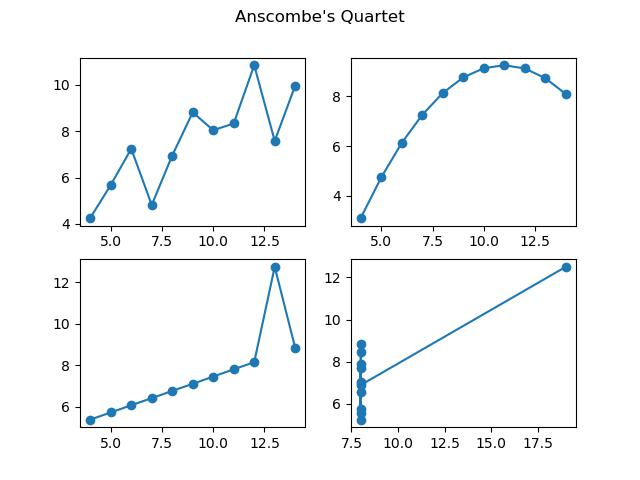

In [15]:
# (9) Multiple Subplots
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 19])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 5.56, 7.91, 6.89, 12.50])
x_order = np.argsort(x)

fig, axs = plt.subplots(2, 2)
fig.suptitle("Anscombe's Quartet")
axs[0][0].plot(x[x_order], y1[x_order], "-o")
axs[0][1].plot(x[x_order], y2[x_order], "-o")
axs[1][0].plot(x[x_order], y3[x_order], "-o")
axs[1][1].plot(x4, y4, "-o")

show_with_api_alt(methods=["html", "markdown", "img_file"], output_file="ans_quartet_api_alt")

### Box plot

If no API key is given, it is automatically inferred from the ``OPENAI_API_KEY`` or ``AZURE_OPENAI_API_KEY`` environment variable, but this is not reccomended.

Using the api key from the environment variable OPENAI_API_KEY


This figure is a boxplot titled 'Distributional differences in Anscombe's quartet'. On the horizontal x-axis, Subplot Num is plotted from 0 to 3, indicating the four subplots in the quartet. The vertical y-axis represents the 'Y value in Anscombe's quartet' ranging from 2 to 14.

There are four boxplots in different colors: blue for 0, orange for 1, green for 2, and red for 3. Each shows the distribution of Y values for the respective data set in the quartet.

Boxplot 0 has a median of 7.58 and an interquartile range of 2.26, without any outliers.
Boxplot 1 has a median of 8.14, an interquartile range of 2.25, and one outlier represented by a small circle below the main box at y=3.1.
Boxplot 2 has a median of 7.11, an interquartile range of 1.73, and one outlier above the main box at y=12.7.
Boxplot 3 has a median of 7.04, an interquartile range of 2.02, and one outlier at y=12.5, also above the main box.

The plots highlight the distributional differences within datasets that have identical simple statistical properties, demonstrating that similar summary statistics can misleadingly imply similar distributions. The Anscombe's quartet is commonly used to illustrate the importance of graphing data before analyzing it and the effect of outliers and distribution shapes on statistical properties.


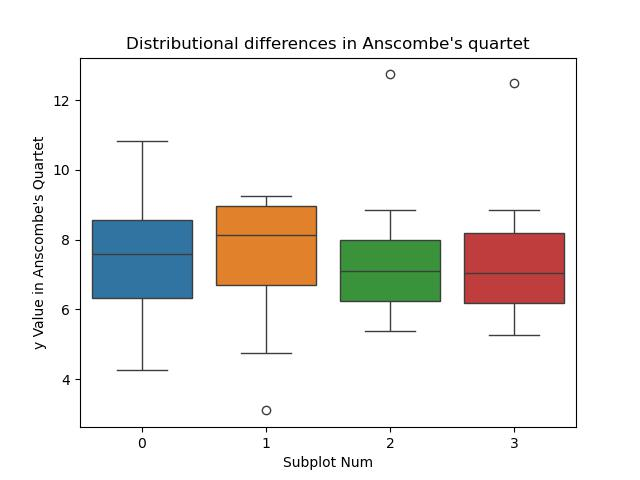

In [17]:
# (10) Boxplot
bp = sns.boxplot([y1, y2, y3, y4])
plt.ylabel("y Value in Anscombe's Quartet")
plt.xlabel("Subplot Num")
plt.title("Distributional differences in Anscombe's quartet")

show_with_api_alt(methods=["html", "markdown"], max_tokens=400)